In [ ]:
# Updating, upgrading and removing necessary packages from the OS
! sudo apt-get update
! sudo apt-get upgrade
! sudo apt-get autoremove

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
! sudo apt --fix-broken install

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [ ]:
! sudo apt-get install cm-super #1
! sudo apt-get install dvipng texlive-fonts-recommended texlive-latex-extra #2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cm-super is already the newest version (0.3.4-17).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
dvipng is already the newest version (1.15-1.1).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [ ]:
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.path import Path
import numpy as np
import os,glob
from scipy import signal

In [ ]:
  plt.rc('text', usetex=True)
  plt.rc('font', family='serif')
  plt.rc('text.latex', preamble = r'\usepackage{amsmath}')
  plt.rc('xtick', labelsize = 23)
  plt.rc('ytick', labelsize = 23)
  plt.rcParams["axes.linewidth"] = 2.0

In [ ]:
# get this file from the correspodnding box folder
from google.colab import files
file = files.upload()

Saving literature_68deg.csv to literature_68deg (1).csv
Saving literature_115deg.csv to literature_115deg (1).csv
Saving simulation_68deg.csv to simulation_68deg (1).csv
Saving simulation_115deg.csv to simulation_115deg (1).csv


In [ ]:
# Load the literature and present simulation data from CSV files
expt_data = np.genfromtxt("literature_68deg.csv", delimiter=",")
simulation_data = np.genfromtxt("simulation_68deg.csv", delimiter=",")
sim_data_115deg = np.genfromtxt("literature_115deg.csv", delimiter=",")
mysim_data_115deg = np.genfromtxt("simulation_115deg.csv", delimiter=",")

# Extract the x and y values for plotting
expt_x, expt_y = expt_data[:, 0], expt_data[:, 1]
simulation_x, simulation_y = simulation_data[:, 0], simulation_data[:, 1]
sim_115deg_x, sim_115deg_y = sim_data_115deg[:, 0], sim_data_115deg[:, 1]
mysim_115deg_x, mysim_115deg_y = mysim_data_115deg[:, 0], mysim_data_115deg[:, 1]

In [ ]:
# estimate the critical Ca (when Ca_cl = Ca) from the literature data when the instability just starts

# Filter the data where x > 0.015
filtered_data_68deg = expt_data[expt_x > 0.015]
# Compute the mean of y for x > 0.015
mean_y_68deg = np.mean(filtered_data_68deg[:, 1])
intersection_x_68deg = mean_y_68deg  # Because the intersection happens where y = x
# The corresponding y value is the mean of y for x > 0.015, which is mean_y
intersection_y_68deg = mean_y_68deg

# Filter the data where x > 0.015
filtered_data_115deg = sim_data_115deg[sim_115deg_x > 0.35]
# Compute the mean of y for x > 0.015
mean_y_115deg = np.mean(filtered_data_115deg[:, 1])
intersection_x_115deg = mean_y_115deg  # Because the intersection happens where y = x
# The corresponding y value is the mean of y for x > 0.015, which is mean_y
intersection_y_115deg = mean_y_115deg

print(intersection_y_68deg, intersection_y_115deg)

0.013780227309770701 0.3505351797540672


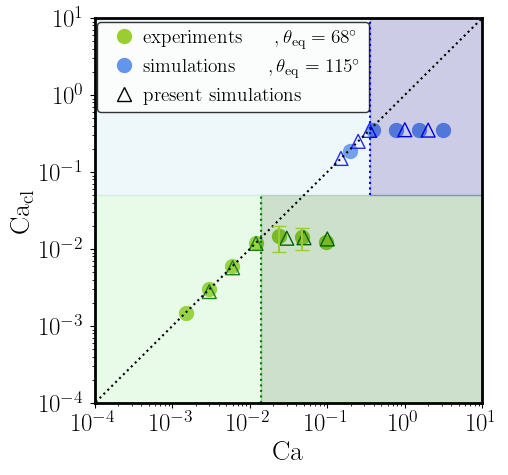

In [ ]:
# Create the plot of contact line Ca vs inlet Ca for both imbibition and drainage cases

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

# Load the data from CSV files
expt_data = np.genfromtxt("literature_68deg.csv", delimiter=",")
simulation_data = np.genfromtxt("simulation_68deg.csv", delimiter=",")
sim_data_115deg = np.genfromtxt("literature_115deg.csv", delimiter=",")
mysim_data_115deg = np.genfromtxt("simulation_115deg.csv", delimiter=",")

# Extract the x and y values for plotting
expt_x, expt_y = expt_data[:, 0], expt_data[:, 1]
simulation_x, simulation_y = simulation_data[:, 0], simulation_data[:, 1]
sim_115deg_x, sim_115deg_y = sim_data_115deg[:, 0], sim_data_115deg[:, 1]
mysim_115deg_x, mysim_115deg_y = mysim_data_115deg[:, 0], mysim_data_115deg[:, 1]

# Create the plot
plt.figure(figsize=(5, 5))

# Set log scales for both axes
plt.xscale("log")
plt.yscale("log")

minval = 1e-4
maxval = 10

# Set axis ranges
plt.xlim(minval, maxval)
plt.ylim(minval, maxval)

# Set axis labels and font sizes
plt.xlabel(r"$\mathrm{Ca}$", fontsize=20, fontweight='bold')
plt.ylabel(r"$\mathrm{Ca_{cl}}$", fontsize=20)

# Define error for some data
error_index_1 = 4
y_error_low_1 = expt_y[error_index_1] - 9.1746e-3
y_error_high_1 = 1.9831e-2 - expt_y[error_index_1]

error_index_2 = 5
y_error_low_2 = expt_y[error_index_2] - 9.7842e-3
y_error_high_2 = 1.8558e-2 - expt_y[error_index_2]

# Increase font size for ticks
plt.tick_params(axis="both", which="major", labelsize=18)

# Plot the y=x reference line
x = np.linspace(minval*0.1, maxval, 100)
plt.plot(x, x, color="black", linestyle=":", linewidth=1.5)

# Plot experimental data for 68deg
plt.scatter(expt_x, expt_y, color="yellowgreen", s=100, label=r"$\text{Zhao et al.}, \theta_\mathrm{eq} = 68^\circ$", marker="o")
plt.errorbar(expt_x[error_index_1], expt_y[error_index_1], yerr=[[y_error_low_1], [y_error_high_1]],
             markerfacecolor='none', markeredgecolor='yellowgreen', ecolor='yellowgreen', capsize=5)
plt.errorbar(expt_x[error_index_2], expt_y[error_index_2], yerr=[[y_error_low_2], [y_error_high_2]],
             markerfacecolor='none', markeredgecolor='yellowgreen', ecolor='yellowgreen', capsize=5)
plt.scatter(simulation_x, simulation_y, edgecolors="darkgreen", facecolors="none", s=100,
            label=r"$\text{present}, \theta_\mathrm{eq} = 68^\circ$", marker="^")
plt.scatter(sim_115deg_x, sim_115deg_y, color="cornflowerblue", s=100,
            label=r"$\text{Esmaeilzadeh et al.}, \theta_\mathrm{eq} = 115^\circ$", marker="o")
plt.scatter(mysim_115deg_x, mysim_115deg_y, edgecolors="blue", facecolors="none", s=100,
            label=r"$\text{present}, \theta_\mathrm{eq} = 115^\circ$", marker="^")

# Create custom legend handles
custom_handles = [
    Line2D([0], [0], marker='o', color='yellowgreen', label=r'$\text{experiments} \ \ \ \ \ , \theta_\mathrm{eq} = 68^\circ$', markersize=10, linestyle='None'),
    Line2D([0], [0], marker='o', color='cornflowerblue', label=r'$\text{simulations} \ \ \ \ \ ,  \theta_\mathrm{eq} = 115^\circ$', markersize=10, linestyle='None'),
    Line2D([0], [0], marker='^', color='black', label=r'$\text{present simulations}$', markersize=10, linestyle='None', markerfacecolor='None'),
]

# Add colored regions based on `Ca_cl` value
plt.gca().add_patch(Rectangle((minval, minval), intersection_y_68deg - minval, 0.05, color='lightgreen', alpha=0.2))
plt.gca().add_patch(Rectangle((intersection_y_68deg, minval), maxval, 0.05, color='darkgreen', alpha=0.2))
plt.gca().add_patch(Rectangle((minval, 0.05 + minval), intersection_y_115deg - minval, 10, color='lightblue', alpha=0.2))
plt.gca().add_patch(Rectangle((intersection_y_115deg, 0.05 + minval), maxval, maxval, color='darkblue', alpha=0.2))

# draw some dotted lines
x = np.linspace(minval, maxval, 100)
y = np.full_like(x, 0.05)
y = np.linspace(minval, 0.05, 100)
x = np.full_like(y, intersection_y_68deg)
plt.plot(x, y, color="green", linestyle=":", linewidth=1.5)
y = np.linspace(0.05, maxval, 100)
x = np.full_like(y, intersection_y_115deg)
plt.plot(x, y, color="blue", linestyle=":", linewidth=1.5)

# Add the custom legend
leg = plt.legend(handles=custom_handles, loc=(0.005, 0.755), fontsize=14, handletextpad=0.0)
leg.get_frame().set_linewidth(1.0)
leg.get_frame().set_edgecolor('k')

# Save the plot as a PNG file (optional)
plt.savefig('ca_vs_cacl_rigid.png', bbox_inches='tight', dpi=500)
plt.show()


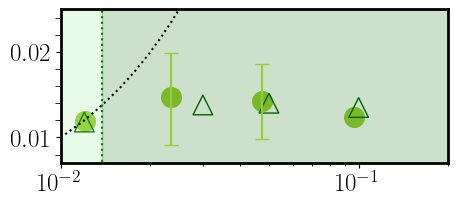

In [ ]:
# Create the zoomed inset plot for 68deg
fig, ax = plt.subplots(figsize=(5, 2))

# Set log scales for both axes
ax.set_xscale("log")

minvalx = 1e-2
maxvalx = 2e-1
minvaly = 7e-3
maxvaly = 2.5e-2

# Set axis ranges
ax.set_xlim(minvalx, maxvalx)
ax.set_ylim(minvaly, maxvaly)

# Enable minor ticks on the y-axis
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(axis="y", which="minor", length=4, color='black')

# Define error for some data
error_index_1 = 4
y_error_low_1 = expt_y[error_index_1] - 9.1746e-3
y_error_high_1 = 1.9831e-2 - expt_y[error_index_1]

error_index_2 = 5
y_error_low_2 = expt_y[error_index_2] - 9.7842e-3
y_error_high_2 = 1.8558e-2 - expt_y[error_index_2]

# Increase font size for ticks
plt.tick_params(axis="both", which="major", labelsize=18)

# Plot the y=x reference line
x = np.linspace(minvalx, maxvalx, 100)
ax.plot(x, x, color="black", linestyle=":", linewidth=1.5)

# Plot experimental data
plt.scatter(expt_x, expt_y, color="yellowgreen", s=200, label=r"$\text{Zhao et al.}, \theta_\mathrm{eq} = 68^\circ$", marker="o")
plt.errorbar(expt_x[error_index_1], expt_y[error_index_1], yerr=[[y_error_low_1], [y_error_high_1]],
             markerfacecolor='none', markeredgecolor='yellowgreen', ecolor='yellowgreen', capsize=5)
plt.errorbar(expt_x[error_index_2], expt_y[error_index_2], yerr=[[y_error_low_2], [y_error_high_2]],
             markerfacecolor='none', markeredgecolor='yellowgreen', ecolor='yellowgreen', capsize=5)
plt.scatter(simulation_x, simulation_y, edgecolors="darkgreen", facecolors="none", s=200,
            label=r"$\text{present}, \theta_\mathrm{eq} = 68^\circ$", marker="^")
plt.scatter(sim_115deg_x, sim_115deg_y, color="cornflowerblue", s=200,
            label=r"$\text{Esmaeilzadeh et al.}, \theta_\mathrm{eq} = 115^\circ$", marker="o")
plt.scatter(mysim_115deg_x, mysim_115deg_y, edgecolors="blue", facecolors="none", s=200,
            label=r"$\text{present}, \theta_\mathrm{eq} = 115^\circ$", marker="^")

# Add colored regions based on `Ca_cl` value
ax.add_patch(Rectangle((minvalx, minvaly), intersection_y_68deg - minvalx, maxvaly, color='lightgreen', alpha=0.2))
ax.add_patch(Rectangle((intersection_y_68deg, minvaly), maxvalx, maxvaly, color='darkgreen', alpha=0.2))

# draw some dotted lines
x = np.linspace(minval, maxval, 100)
y = np.full_like(x, 0.05)
# plt.plot(x, y, color="black", linestyle="-", linewidth=0.5)
y = np.linspace(minval, 0.05, 100)
x = np.full_like(y, intersection_y_68deg)
plt.plot(x, y, color="green", linestyle=":", linewidth=1.5)
y = np.linspace(0.05, maxval, 100)
x = np.full_like(y, intersection_y_115deg)
plt.plot(x, y, color="blue", linestyle=":", linewidth=1.5)

# Save and display the plot
plt.savefig('ca_vs_cacl_zoomed_68deg.png', bbox_inches='tight', dpi=500)
plt.show()

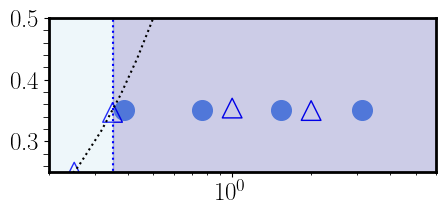

In [ ]:
# Create the zoomed inset plot for 115deg
fig, ax = plt.subplots(figsize=(5, 2))

# Set log scales for both axes
ax.set_xscale("log")

minvalx = 2e-1
maxvalx = 6.0
minvaly = 2.5e-1
maxvaly = 5e-1

# Set axis ranges
ax.set_xlim(minvalx, maxvalx)
ax.set_ylim(minvaly, maxvaly)

# Enable minor ticks on the y-axis
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(axis="y", which="minor", length=4, color='black')

# Define error for some data
error_index_1 = 4
y_error_low_1 = expt_y[error_index_1] - 9.1746e-3
y_error_high_1 = 1.9831e-2 - expt_y[error_index_1]

error_index_2 = 5
y_error_low_2 = expt_y[error_index_2] - 9.7842e-3
y_error_high_2 = 1.8558e-2 - expt_y[error_index_2]

# Define custom ticks for the x-axis
custom_ticks = [0.30, 0.40, 0.50]
ax.set_yticks(custom_ticks)
ax.set_yticklabels([str(tick) for tick in custom_ticks])

# Increase font size for ticks
plt.tick_params(axis="both", which="major", labelsize=18)

# Plot the y=x reference line
x = np.linspace(minvalx, maxvalx, 100)
ax.plot(x, x, color="black", linestyle=":", linewidth=1.5)

# Plot experimental data
plt.scatter(expt_x, expt_y, color="yellowgreen", s=200, label=r"$\text{Zhao et al.}, \theta_\mathrm{eq} = 68^\circ$", marker="o")
plt.errorbar(expt_x[error_index_1], expt_y[error_index_1], yerr=[[y_error_low_1], [y_error_high_1]],
             markerfacecolor='none', markeredgecolor='yellowgreen', ecolor='yellowgreen', capsize=5)
plt.errorbar(expt_x[error_index_2], expt_y[error_index_2], yerr=[[y_error_low_2], [y_error_high_2]],
             markerfacecolor='none', markeredgecolor='yellowgreen', ecolor='yellowgreen', capsize=5)
plt.scatter(simulation_x, simulation_y, edgecolors="darkgreen", facecolors="none", s=200,
            label=r"$\text{present}, \theta_\mathrm{eq} = 68^\circ$", marker="^")
plt.scatter(sim_115deg_x, sim_115deg_y, color="cornflowerblue", s=200,
            label=r"$\text{Esmaeilzadeh et al.}, \theta_\mathrm{eq} = 115^\circ$", marker="o")
plt.scatter(mysim_115deg_x, mysim_115deg_y, edgecolors="blue", facecolors="none", s=200,
            label=r"$\text{present}, \theta_\mathrm{eq} = 115^\circ$", marker="^")

# Add colored regions based on `Ca_cl` value
plt.gca().add_patch(Rectangle((minval, 0.05 + minval), intersection_y_115deg - minval, 10, color='lightblue', alpha=0.2))
plt.gca().add_patch(Rectangle((intersection_y_115deg, 0.05 + minval), maxval, maxval, color='darkblue', alpha=0.2))

# draw some dotted lines
x = np.linspace(minval, maxval, 100)
y = np.full_like(x, 0.05)
y = np.linspace(minval, 0.05, 100)
x = np.full_like(y, intersection_y_68deg)
plt.plot(x, y, color="green", linestyle=":", linewidth=1.5)
y = np.linspace(0.05, maxval, 100)
x = np.full_like(y, intersection_y_115deg)
plt.plot(x, y, color="blue", linestyle=":", linewidth=1.5)

# Save and display the plot
plt.savefig('ca_vs_cacl_zoomed_115deg.png', bbox_inches='tight', dpi=500)
plt.show()

In [33]:
# get this file from the correspodnding box folder
from google.colab import files
file = files.upload()

Saving simulation_ca0_012_dw_0.csv to simulation_ca0_012_dw_0.csv


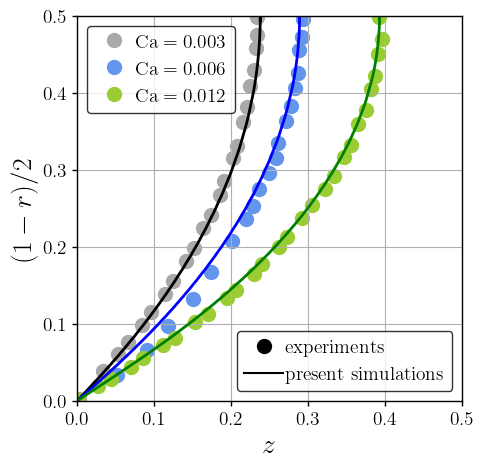

In [34]:
# steady state air-glycerol interface profiles - comparison with expts and present simulations

import pandas as pd

# Read data from CSV files
data1 = pd.read_csv('expt_ca0_003.csv', header=None)
data2 = pd.read_csv('simulation_ca0_003.csv', header=None)
data3 = pd.read_csv('expt_ca0_006.csv', header=None)
data4 = pd.read_csv('simulation_ca0_006.csv', header=None)
data5 = pd.read_csv('expt_ca0_012.csv', header=None)
data6 = pd.read_csv('simulation_ca0_012.csv', header=None)
data7 = pd.read_csv('simulation_ca0_012_dw_0.csv', header=None)

# Extract y and z values for each dataset
z1, y1 = data1[0].values, data1[1].values
z2, y2 = data2[0].values, data2[1].values
z3, y3 = data3[0].values, data3[1].values
z4, y4 = data4[0].values, data4[1].values
z5, y5 = data5[0].values, data5[1].values
z6, y6 = data6[0].values, data6[1].values
z7, y7 = data7[0].values, data7[1].values

# length factor for scaling along the axial and radial directions
scale = 2.0

# Create the plot
plt.figure(figsize=(5, 5))
plt.gca().set_aspect('equal', adjustable='box')

# Plot each dataset
plt.scatter(scale * z1, y1, color="darkgray", s=100, label=r"experiments, $\mathrm{Ca} = 0.003$", marker="o")
plt.plot(-y2 - min(-y2), -z2 / 2. + 0.5, 'k-', linewidth=2, label=r'$Ca = 0.003$, simulation')
plt.scatter(scale * z3, y3, color="cornflowerblue", s=100, label=r"experiments, $\mathrm{Ca} = 0.006$", marker="o")
plt.plot(-y4 - min(-y4), -z4 / 2. + 0.5, 'b-', linewidth=2, label=r'$Ca = 0.006$, simulation')
plt.scatter(scale * z5, y5, color="yellowgreen", s=100, label=r"experiments, $\mathrm{Ca} = 0.012$", marker="o")
plt.plot(-y6 - min(-y6), -z6 / 2. + 0.5, 'g-', linewidth=2, label=r'$Ca = 0.012$, simulation')

# Set axis ranges
plt.xlim(-1e-4, 0.5+1e-4)
plt.ylim(-1e-4, 0.5+1e-4)

# Add labels and title
plt.xlabel(r'$z$', fontsize=20)
plt.ylabel(r'$(1-r)/2$', fontsize=20)

# Create custom legend handles
custom_handles = [
    Line2D([0], [0], marker='o', color='black', label=r'$\text{experiments}$', markersize=10, linestyle='None'),
    Line2D([0], [0], color='black', label=r'$\text{present simulations}$', linestyle='-'),
]

custom_handles2 = [
    Line2D([0], [0], marker='o', color='darkgray', label=r'$\mathrm{Ca} = 0.003$', markersize=10, linestyle='None'),
    Line2D([0], [0], marker='o', color='cornflowerblue', label=r'$\mathrm{Ca} = 0.006$', markersize=10, linestyle='None'),
    Line2D([0], [0], marker='o', color='yellowgreen', label=r'$\mathrm{Ca} = 0.012$', markersize=10, linestyle='None'),
]

# Add the custom legend
leg = plt.legend(handles=custom_handles, loc="best", fontsize=14, ncol=1, frameon=True, handletextpad=0.1)
leg.get_frame().set_linewidth(1.0)
leg.get_frame().set_edgecolor('k')

leg2 = plt.legend(handles=custom_handles2, loc="upper left", fontsize=14, ncol=1, frameon=True, handletextpad=0.1)
leg2.get_frame().set_linewidth(1.0)
leg2.get_frame().set_edgecolor('k')

# Set axis limits and other properties
plt.grid(True)
plt.gca().add_artist(leg)  # Add the first legend manually to the current Axes
plt.gca().tick_params(axis='both', which='major', labelsize=14, width=1)
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

# Save or display the plot
plt.savefig('ffinterfaceprofile_rigid.png', dpi=500)
plt.show()


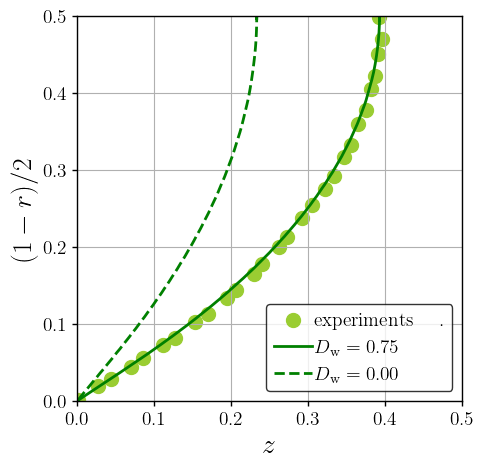

In [35]:
# steady state air-glycerol interface profiles - comparing non-zero dynamic wall mobility with zero dynamic wall mobility (dw)
# dw: factor used in the dynamic wettability condition; if dw = 0, static contact angle boundary condition

# length factor for scaling along the axial and radial directions
scale = 2.0

# Create the plot
plt.figure(figsize=(5, 5))
plt.gca().set_aspect('equal', adjustable='box')

# Plot each dataset
plt.scatter(scale * z5, y5, color="yellowgreen", s=100, label=r"$\text{experiments} \ \ \ \ \null{.}$", marker="o")
plt.plot(-y6 - min(-y6), -z6 / 2. + 0.5, 'g-', linewidth=2, label=r'$D_\mathrm{w} = 0.75$')
plt.plot(-y7 - min(-y7), -z7 / 2. + 0.5, 'g--', linewidth=2, label=r'$D_\mathrm{w} = 0.00$')

# Set axis ranges
plt.xlim(-1e-4, 0.5+1e-4)
plt.ylim(-1e-4, 0.5+1e-4)

# Add labels and title
plt.xlabel(r'$z$', fontsize=20)
plt.ylabel(r'$(1-r)/2$', fontsize=20)

# add legend here
leg = plt.legend(loc="lower right", fontsize=14, ncol=1, frameon=True, handletextpad=0.1)
leg.get_frame().set_linewidth(1.0)
leg.get_frame().set_edgecolor('k')

# Set axis limits and other properties
plt.grid(True)
plt.gca().tick_params(axis='both', which='major', labelsize=14, width=1)
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

# Save or display the plot
plt.savefig('dynamic_vs_stat_contangle.png', dpi=500)
plt.show()

In [36]:
# upload the relevant files
from google.colab import files
file = files.upload()

Saving simdata_cat_hf.csv to simdata_cat_hf.csv


In [38]:
import pandas as pd

data1 = pd.read_csv('simulation_tipca_filmthickness.csv')

# Extract y and z values for each dataset
mysim_ca = data1.iloc[:, 1].values
mysim_cat = data1.iloc[:, 2].values
mysim_hf = data1.iloc[:, 3].values

<ipython-input-39-db9e520b496b>:8: RuntimeWarning: invalid value encountered in power
  return rad * 1.34 * (Ca_f)**(2./3)


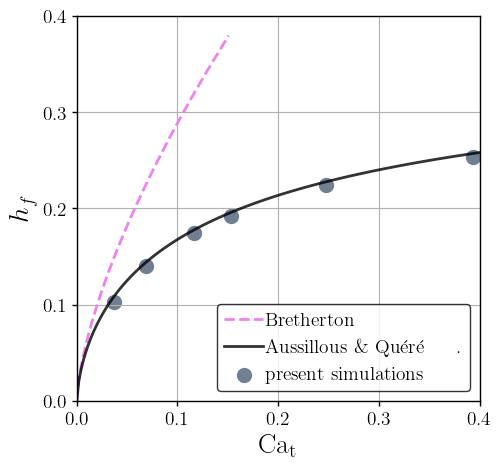

In [39]:
# compute entrained film thickness and interface tip capillary number when interface is unstable

from scipy.optimize import fsolve

# confidence percentage from the theory
err_pc = 0.05

# bretherton (1961)
def compute_hf_br(Ca_f, rad):
    return rad * 1.34 * (Ca_f)**(2./3)

def compute_catip_br(vel_fing, rad, mu, gamma, vel_inlet):
    Ca_f = mu * vel_fing / gamma
    h_f = compute_hf_br(Ca_f, rad)
    return np.pi * vel_inlet * rad**2 - np.pi * (rad - h_f)**2 * vel_fing

# aussillous & quere (2000)
def compute_hf_aq(Ca_f, rad):
    return rad * 1.34 * (Ca_f)**(2./3) / (1. + 1.34 * 2.5 * (Ca_f)**(2./3))

def compute_catip_aq(vel_fing, rad, mu, gamma, vel_inlet):
    Ca_f = mu * vel_fing / gamma
    h_f = compute_hf_aq(Ca_f, rad)
    return np.pi * vel_inlet * rad**2 - np.pi * (rad - h_f)**2 * vel_fing

# klaseboer et al. (2014)
def compute_hf_kl(Ca_f, rad):
    return rad * 1.34 * (Ca_f)**(2./3) / (1. + 1.34 * 2.79 * (Ca_f)**(2./3))

def compute_catip_kl(vel_fing, rad, mu, gamma, vel_inlet):
    Ca_f = mu * vel_fing / gamma
    h_f = compute_hf_kl(Ca_f, rad)
    return np.pi * vel_inlet * rad**2 - np.pi * (rad - h_f)**2 * vel_fing

# Parameters
rad = 3.75E-4    # radius of capillary tube
mu = 0.2         # glycerol viscosity
gamma = 0.065    # surface tension
rho_glyc = 1260  # density of glycerol
ca_values = np.linspace(0.0, 3, 1500)
finger_cas_aq = []
finger_cas_br = []
finger_cas_kl = []
film_thicknesses_aq = []
film_thicknesses_br = []
film_thicknesses_kl = []

# reference variables for scaling
rad_scl = rad
vel_scl = gamma / mu
time_scl = rad_scl / vel_scl
rho_scl = rho_glyc
mu_scl = rho_scl * vel_scl * rad_scl
gamma_scl = rho_scl * vel_scl**2 * rad_scl

# dimensionless variables
rad /= rad_scl
mu /= mu_scl
gamma /= gamma_scl

# Loop over different Ca values
for Ca in ca_values:
    vel_inlet = Ca * gamma / mu  # average inlet velocity of air
    vel_fing0 = 0.1 * vel_inlet  # initial guess for finger velocity
    vel_fing_br, info, ier, msg = fsolve(compute_catip_br, vel_fing0, args=(rad, mu, gamma, vel_inlet), full_output=True, xtol=1e-6)
    vel_fing_aq, info, ier, msg = fsolve(compute_catip_aq, vel_fing0, args=(rad, mu, gamma, vel_inlet), full_output=True, xtol=1e-6)
    vel_fing_kl, info, ier, msg = fsolve(compute_catip_kl, vel_fing0, args=(rad, mu, gamma, vel_inlet), full_output=True, xtol=1e-6)

    if ier != 1:
        continue  # if fsolve doesn't converge, skip this Ca

    # aussilous & quere
    finger_ca_aq = mu * vel_fing_aq / gamma
    film_thickness_aq = compute_hf_aq(finger_ca_aq, rad)
    finger_cas_aq.append(finger_ca_aq)
    film_thicknesses_aq.append(film_thickness_aq)

    # bretherton
    finger_ca_br = mu * vel_fing_br / gamma
    film_thickness_br = compute_hf_br(finger_ca_br, rad)
    finger_cas_br.append(finger_ca_br)
    film_thicknesses_br.append(film_thickness_br)

    # klaseboer et al.
    finger_ca_kl = mu * vel_fing_kl / gamma
    film_thickness_kl = compute_hf_kl(finger_ca_kl, rad)
    finger_cas_kl.append(finger_ca_kl)
    film_thicknesses_kl.append(film_thickness_kl)

plt.figure(figsize=(5.2, 5))

finger_cas_br = np.array(finger_cas_br)
finger_cas_aq = np.array(finger_cas_aq)
finger_cas_kl = np.array(finger_cas_kl)
film_thicknesses_br = np.array(film_thicknesses_br)
film_thicknesses_aq = np.array(film_thicknesses_aq)
film_thicknesses_kl = np.array(film_thicknesses_kl)

# last few entries are removed as bretherton's expression gives incorrect results for high ca (note: bretherton is valid only at low ca)
plt.plot(finger_cas_br[np.where(ca_values < 0.06)[0]], film_thicknesses_br[np.where(ca_values < 0.06)[0]], color="violet", linestyle='--', linewidth=2, label=r'Bretherton')
plt.plot(finger_cas_aq, film_thicknesses_aq, color="black", alpha = 0.8, linestyle='-', linewidth=2, label=r'Aussillous \& Qu\'er\'e \ \ \ \ \null{.}')
plt.scatter(mysim_cat, mysim_hf, color="slategrey", s=100, marker="o", label=r'present simulations')

# Set axis ranges
plt.xlim(-1e-4, 0.4+1e-4)
plt.ylim(-1e-4, 0.4+1e-4)

# Set specific ticks on x-axis and y-axis
plt.xticks([0.0, 0.1, 0.2, 0.3, 0.4])
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4])

# Add labels and title
plt.xlabel(r'$\mathrm{Ca_{t}}$', fontsize=20)
plt.ylabel(r'$h_f$', fontsize=20)

# add legend here
leg = plt.legend(loc="best", fontsize=14, ncol=1, frameon=True, handletextpad=0.1)
leg.get_frame().set_linewidth(1.0)
leg.get_frame().set_edgecolor('k')

# Set axis limits and other properties
plt.grid(True)
plt.gca().tick_params(axis='both', which='major', labelsize=14, width=1)
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

# Save or display the plot
plt.savefig('hf_vs_catip_68deg.png', dpi=500)
plt.show()

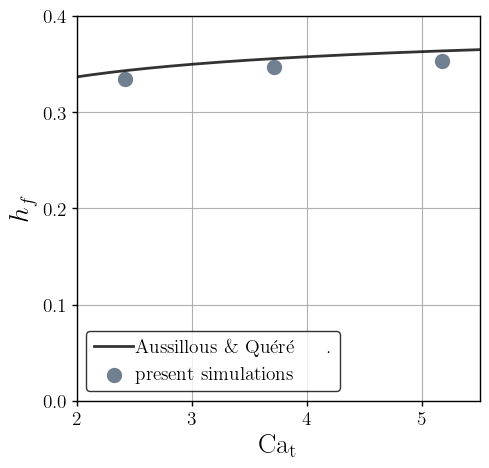

In [40]:
# plot entrained film thickness in non-wetting case

plt.figure(figsize=(5.2, 5))

plt.plot(finger_cas_aq, film_thicknesses_aq, color="black", alpha = 0.8, linestyle='-', linewidth=2, label=r'Aussillous \& Qu\'er\'e \ \ \ \ \null{.}')
plt.scatter(mysim_cat, mysim_hf, color="slategrey", s=100, marker="o", label=r'present simulations')

# Set axis ranges
plt.xlim(2.- 1e-4, 5.5+1e-4)
plt.ylim(-1e-4, 0.4+1e-4)

plt.xlabel(r'$\mathrm{Ca_{t}}$', fontsize=20)
plt.ylabel(r'$h_f$', fontsize=20)

plt.yticks([0.00, 0.10, 0.20, 0.30, 0.40], [0.0, 0.1, 0.20, 0.30, 0.40])

# add legend here
leg = plt.legend(loc="best", fontsize=14, ncol=1, frameon=True, handletextpad=0.1)
leg.get_frame().set_linewidth(1.0)
leg.get_frame().set_edgecolor('k')

# Set axis limits and other properties
plt.grid(True)
plt.gca().tick_params(axis='both', which='major', labelsize=14, width=1)
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

# Save or display the plot
plt.savefig('hf_vs_catip_115deg.png', dpi=500)
plt.show()

In [ ]:
# compute the error between the theoretical and present simulation data for entrained film thickness

# Find the overlapping Ca values for comparison
common_indices = np.intersect1d(np.where(mysim_cat > min(finger_cas_aq)), np.where(mysim_cat < max(finger_cas_aq)))
common_ca = mysim_cat[common_indices]

# Interpolate film thicknesses to match common_ca values.
from scipy.interpolate import interp1d

finger_cas_aq_1d = finger_cas_aq.flatten()
film_thicknesses_aq_1d = film_thicknesses_aq.flatten()

f = interp1d(finger_cas_aq_1d, film_thicknesses_aq_1d)
interp_film_thicknesses = f(common_ca)

# Calculate the absolute difference in film thicknesses
abs_diff = np.abs(mysim_hf[common_indices] - interp_film_thicknesses)

# Calculate the Mean Absolute Error (MAE)
mae = np.mean(abs_diff)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(abs_diff**2))

#Print the results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


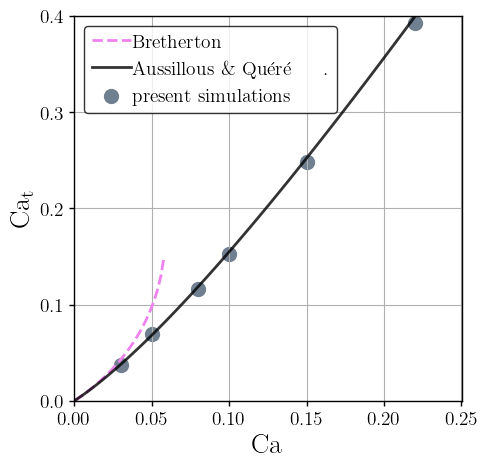

In [41]:
# plot interface tip capillary number in wetting case

plt.figure(figsize=(5, 5))

# last few entries are removed as bretherton's expression gives incorrect results for high ca
plt.plot(ca_values[np.where(ca_values < 0.06)[0]], finger_cas_br[np.where(ca_values < 0.06)[0]], color="violet", linestyle='--', linewidth=2, label=r'Bretherton')
plt.plot(ca_values, finger_cas_aq, color="black", alpha = 0.8, linestyle='-', linewidth=2, label=r'Aussillous \& Qu\'er\'e \ \ \ \ \null{.}')
plt.scatter(mysim_ca, mysim_cat, color="slategrey", s=100, marker="o", label=r'present simulations')

# Set axis ranges
plt.xlim(-1e-4, 0.25+1e-4)
plt.ylim(-1e-4, 0.4+1e-4)

# Set specific ticks on x-axis and y-axis
plt.xticks([0.0, 0.05, 0.1, 0.15, 0.2, 0.25])
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4])

# Add labels and title
plt.xlabel(r'$\mathrm{Ca}$', fontsize=20)
plt.ylabel(r'$\mathrm{Ca_t}$', fontsize=20)

# add legend here
leg = plt.legend(loc="best", fontsize=14, ncol=1, frameon=True, handletextpad=0.1)
leg.get_frame().set_linewidth(1.0)
leg.get_frame().set_edgecolor('k')

# Set axis limits and other properties
plt.grid(True)
plt.gca().tick_params(axis='both', which='major', labelsize=14, width=1)
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

# Save or display the plot
plt.savefig('catip_vs_ca_68deg.png', dpi=500)
plt.show()

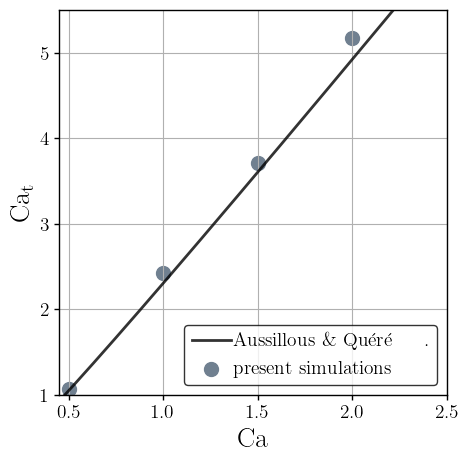

In [42]:
# plot interface tip capillary number in non-wetting case

plt.figure(figsize=(5, 5))

# last few entries are removed as bretherton's expression gives incorrect results for high ca
plt.plot(ca_values, finger_cas_aq, color="black", alpha = 0.8, linestyle='-', linewidth=2, label=r'Aussillous \& Qu\'er\'e \ \ \ \ \null{.}')
plt.scatter(mysim_ca, mysim_cat, color="slategrey", s=100, marker="o", label=r'present simulations')

# Set axis ranges
plt.xlim(0.45- 1e-4, 2.5+1e-4)
plt.ylim(1-1e-4, 5.5+1e-4)

# Add labels and title
plt.xlabel(r'$\mathrm{Ca}$', fontsize=20)
plt.ylabel(r'$\mathrm{Ca_t}$', fontsize=20)

# add legend here
leg = plt.legend(loc="lower right", fontsize=14, ncol=1, frameon=True, handletextpad=0.1)
leg.get_frame().set_linewidth(1.0)
leg.get_frame().set_edgecolor('k')

# Set axis limits and other properties
plt.grid(True)
plt.gca().tick_params(axis='both', which='major', labelsize=14, width=1)
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

# Save or display the plot
plt.savefig('catip_vs_ca_115deg.png', dpi=500)
plt.show()

In [43]:
# compute the error between the theoretical and present simulation data for interface tip capillary number

# Find the overlapping Ca values for comparison
common_indices = np.intersect1d(np.where(mysim_ca > min(ca_values)), np.where(mysim_ca < max(ca_values)))
common_ca = mysim_ca[common_indices]

# Interpolate film thicknesses to match common_ca values.
from scipy.interpolate import interp1d

finger_cas_aq_1d = finger_cas_aq.flatten()
ca_values_1d = ca_values.flatten()

f = interp1d(ca_values_1d, finger_cas_aq_1d)
interp_cat = f(common_ca)

# Calculate the absolute difference in film thicknesses
abs_diff = np.abs(mysim_cat[common_indices] - interp_cat)

# Calculate the Mean Absolute Error (MAE)
mae = np.mean(abs_diff)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(abs_diff**2))

#Print the results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.05013539639351401
Root Mean Squared Error (RMSE): 0.09244699653209529
